In [1]:
import pandas as pd
# import random
import numpy as np
import matplotlib.pyplot as plt
# from IPython.display import Image
import PIL
from PIL import Image, ImageOps


import skimage.io
from skimage.transform import resize


# for cv2 need to pip install opencv-python
import cv2


from tqdm import tqdm


from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

x = train_df['id_code']
y = train_df['diagnosis']

In [3]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [4]:
test_df.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [5]:
print(test_df.shape)
print(train_df.shape)

(1928, 1)
(3662, 2)


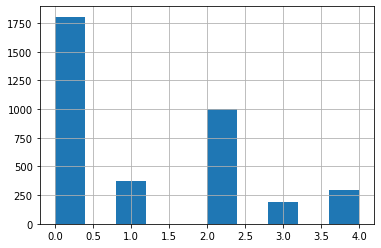

In [11]:
train_df['diagnosis'].hist()

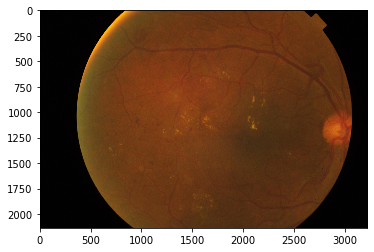

In [12]:
# Reading 1 image
image = cv2.imread(f'train_images/{x[0]}.png')
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

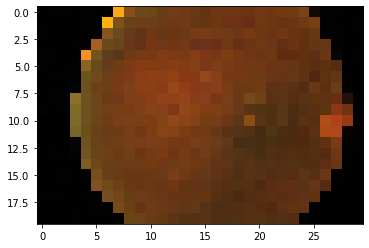

In [13]:
# Resizing image
image = cv2.imread(f'train_images/{x[0]}.png')
plt.imshow(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (30, 20))
plt.imshow(image)

In [14]:
type(image)

numpy.ndarray

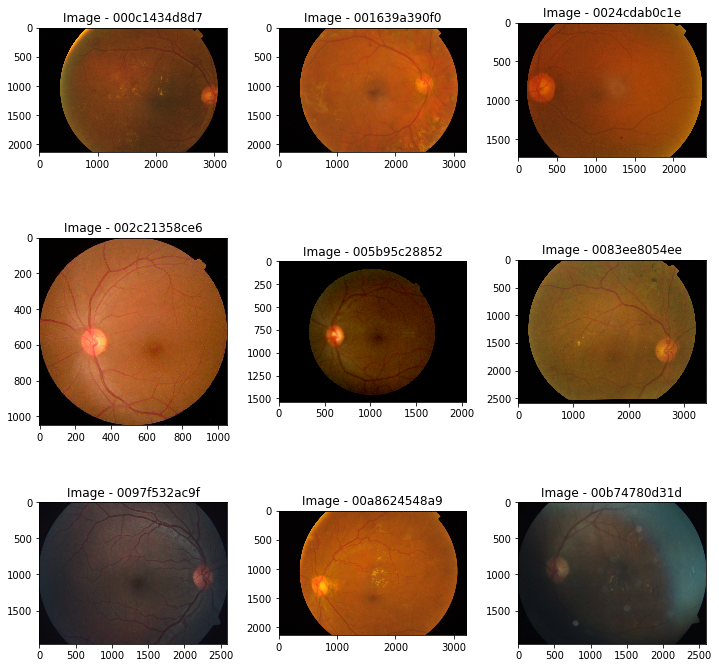

In [15]:
# Printing image grid with color images
columns = 3
rows = 3
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f'train_images/{x[i]}.png')
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image, (1000, 1000))
    plt.imshow(image)
 
plt.tight_layout()


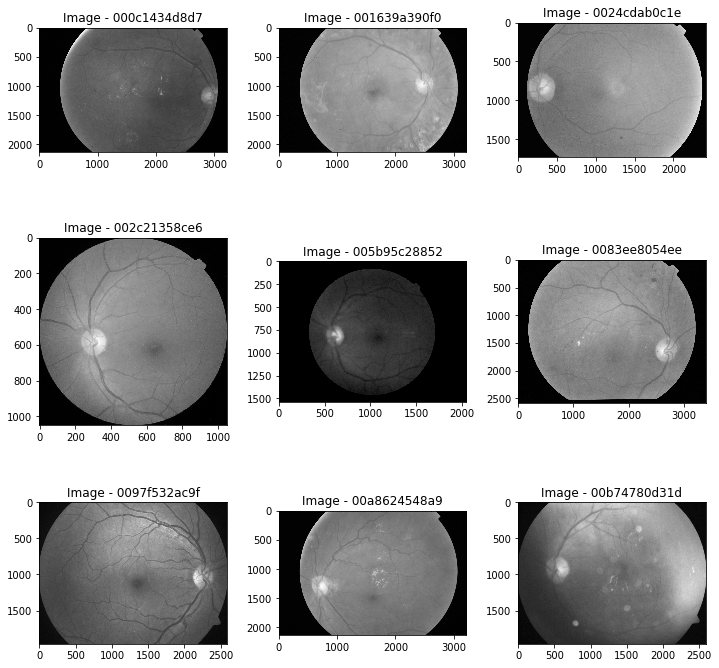

In [16]:
# Printing image grid with B&W images
# %%time
columns = 3
rows = 3
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f'train_images/{x[i]}.png')
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     image = cv2.resize(image, (1000, 1000))
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()

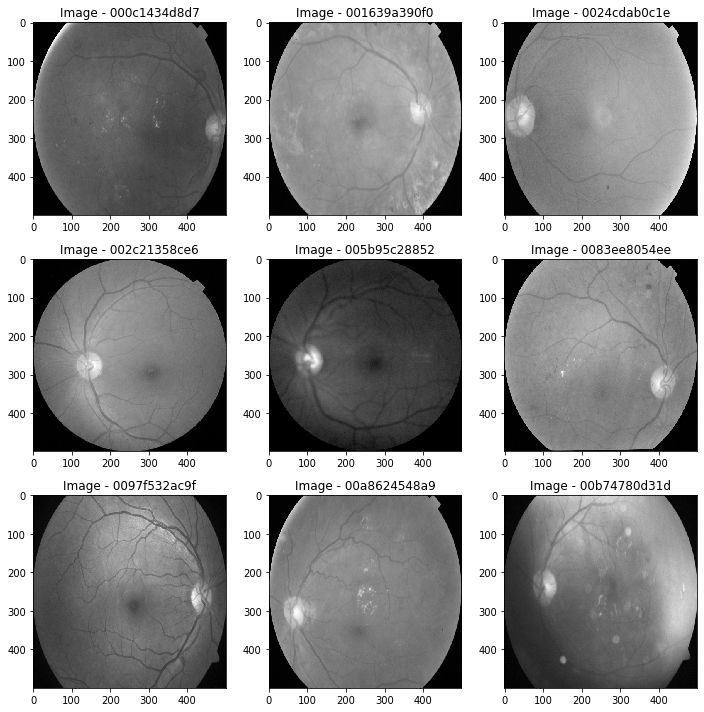

In [17]:
# Adding cropping to images
# Resizing to 500


def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

IMAGESIZE = 500
columns = 3
rows = 3
fig = plt.figure(figsize=(10, 10))
# for i in x:
for i in range(columns*rows):
    image = cv2.imread(f'train_images/{x[i]}.png')
#     print(x[i])
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image1(image)
    image = cv2.resize(image, (IMAGESIZE, IMAGESIZE))
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()

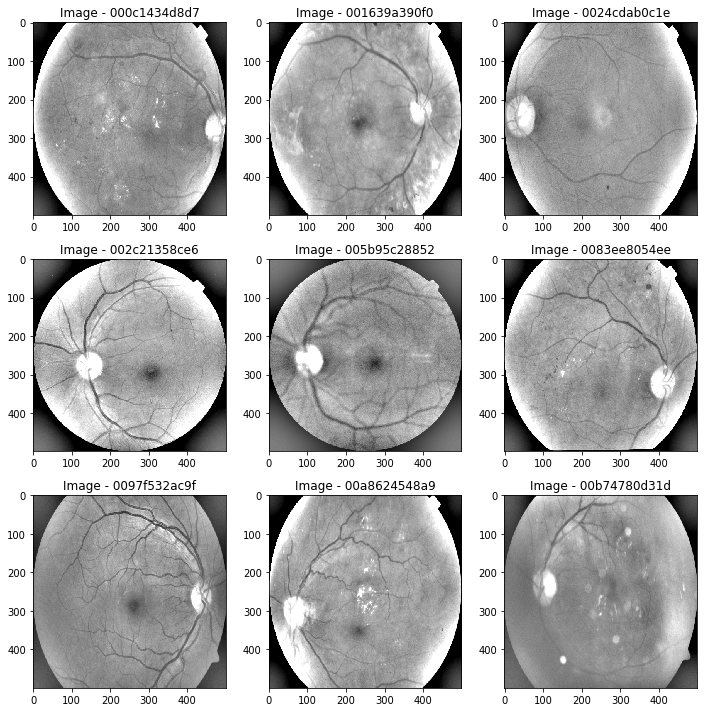

In [15]:
# Adding cropping to images
# Resizing to 500
# Changing brightness of images

def crop_image1(img,tol=7):
    # img is image data
    # tol  is tolerance
        
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]



IMAGESIZE = 500
columns = 3
rows = 3
fig = plt.figure(figsize=(10, 10))

for i in range(columns*rows):
    image = cv2.imread(f'train_images/{x[i]}.png')
    fig.add_subplot(rows, columns, i+1)
    plt.title("Image - " + x[i])
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = crop_image1(image)
    image = cv2.resize(image, (IMAGESIZE, IMAGESIZE))
    image = cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMAGESIZE/10) ,-4 ,128)
    plt.imshow(image, cmap='gray')
    
plt.tight_layout()

In [16]:
class_names = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferative']

In [ ]:
#https://www.kaggle.com/aalejandro/aptos-2019-densenet-keras-starter/edit

In [21]:
# Resizing Images
def get_pad_width(im, new_shape, is_rgb=True):
    pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
    t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2)
    l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2)
    if is_rgb:
        pad_width = ((t,b), (l,r), (0, 0))
    else:
        pad_width = ((t,b), (l,r))
    return pad_width

def preprocess_image(image_path, desired_size=124):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im

In [22]:
# Making modifications to use gray images
N = train_df.shape[0]
x_train = np.empty((N, 124, 124, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(train_df['id_code'])):
    x_train[i, :, :, :] = preprocess_image(
#         f'../input/aptos2019-blindness-detection/train_images/{image_id}.png'
        f'train_images/{image_id}.png'
    )

100%|██████████████████████████████████████████████████████████████████████████████| 3662/3662 [13:12<00:00,  4.81it/s]


In [ ]:
# N = test_df.shape[0]
# x_test = np.empty((N, 124, 124, 3), dtype=np.uint8)

# for i, image_id in enumerate(tqdm(test_df['id_code'])):
#     x_test[i, :, :, :] = preprocess_image(
#         f'test_images/{image_id}.png'
#     )

In [23]:
y_train = pd.get_dummies(train_df['diagnosis']).values

print(x_train.shape)
print(y_train.shape)
# print(x_test.shape)

(3662, 124, 124, 3)
(3662, 5)


In [10]:
y_train[0]

NameError: name 'y_train' is not defined

In [30]:
#Split training data
# need to load sclearn before using train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.15, 
    random_state=2019
)

In [31]:
x_train.shape

(3112, 124, 124, 3)

In [34]:
y_val[0]

array([1, 0, 0, 0, 0], dtype=uint8)